In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_regression
from scipy.stats import zscore
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE


In [4]:
df = pd.read_csv('btc_veri.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Open Time                 959 non-null    object 
 1   Open Price                965 non-null    float64
 2   High Price                963 non-null    float64
 3   Low Price                 961 non-null    float64
 4   Close Price               963 non-null    float64
 5   Volume                    963 non-null    float64
 6   Close Time                961 non-null    object 
 7   Quote Asset Volume        964 non-null    float64
 8   Number of Trades          966 non-null    float64
 9   24h Price Change          961 non-null    float64
 10  24h Price Change Percent  962 non-null    float64
 11  24h High Price            967 non-null    float64
 12  24h Low Price             966 non-null    float64
 13  Weighted Average Price    963 non-null    float64
 14  Hourly_Ret

In [5]:
print(df['Volatility_24h'].value_counts())

Volatility_24h
0.005164    1
0.004935    1
0.002960    1
0.003118    1
0.003112    1
           ..
0.003019    1
0.002960    1
0.003085    1
0.003109    1
0.003286    1
Name: count, Length: 966, dtype: int64


In [6]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max Scaler tanımla
scaler = MinMaxScaler()

# Volatility_24h sütununu ölçeklendir
df['Volatility_24h'] = scaler.fit_transform(df[['Volatility_24h']])

# Yeni sütunu kontrol et
print(df[['Volatility_24h', 'Volatility_24h']].head())


   Volatility_24h  Volatility_24h
0        0.332674        0.332674
1        0.340000        0.340000
2        0.331500        0.331500
3        0.327882        0.327882
4        0.324034        0.324034


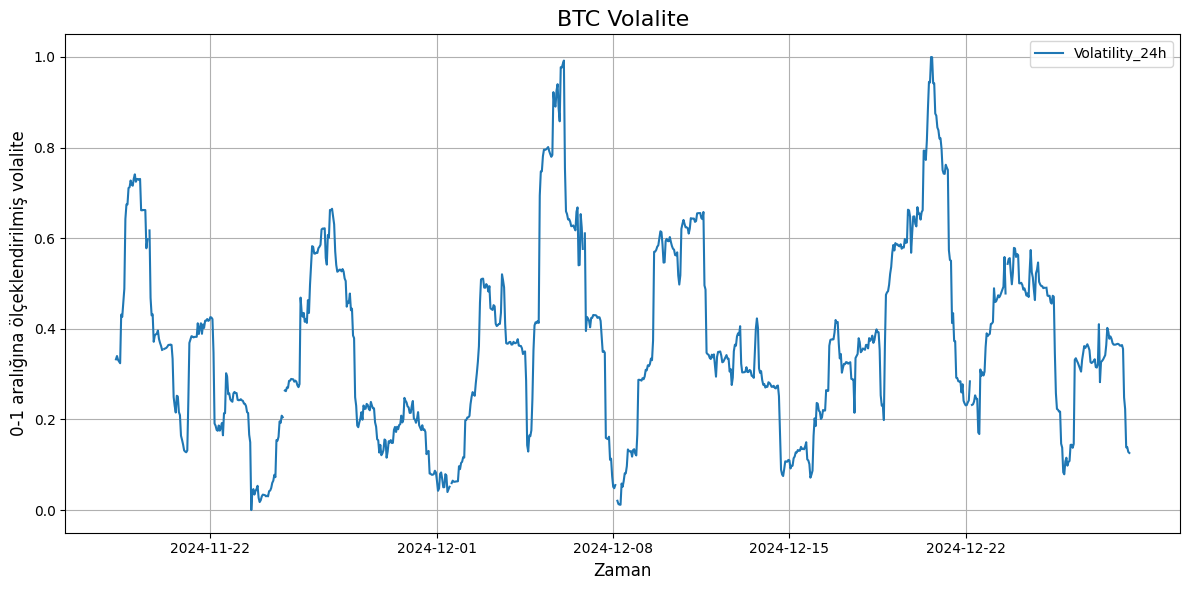

In [7]:


# Close ve Open Time sütunlarını seç
df["Open Time"] = pd.to_datetime(df["Open Time"])  # Tarih formatına çevir
df["Volatility_24h"] = df["Volatility_24h"].astype(float)  # Float türüne çevir

# Close verisinin grafiğini çiz
plt.figure(figsize=(12, 6))
plt.plot(df["Open Time"], df["Volatility_24h"], label="Volatility_24h", linewidth=1.5)

# Grafik ayarları
plt.title("BTC Volalite", fontsize=16)
plt.xlabel("Zaman", fontsize=12)
plt.ylabel("0-1 aralığına ölçeklendirilmiş volalite", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Open Time                 959 non-null    datetime64[ns]
 1   Open Price                965 non-null    float64       
 2   High Price                963 non-null    float64       
 3   Low Price                 961 non-null    float64       
 4   Close Price               963 non-null    float64       
 5   Volume                    963 non-null    float64       
 6   Close Time                961 non-null    object        
 7   Quote Asset Volume        964 non-null    float64       
 8   Number of Trades          966 non-null    float64       
 9   24h Price Change          961 non-null    float64       
 10  24h Price Change Percent  962 non-null    float64       
 11  24h High Price            967 non-null    float64       
 12  24h Low Price         

In [9]:
# obje değerler hariç df2 ye atama
df2 = df.select_dtypes(exclude=['object'])
df2.head()

# korelaasyon matrisine bakma ve Volatility_24h ile korelasyon olanları tespit etme
corr_matrix = df2.corr()
corr_matrix['Volatility_24h'].sort_values(ascending=False)




,Volatility_24h
Volatility_24h,1.000000
ATR_24h,0.916005
Volume_MA24,0.752127
BB_Width_24h,0.700233
ATR_8h,0.677905
Volatility_8h,0.645505
Volume_MA8,0.595472
ATR_4h,0.572294
BB_Width_8h,0.523242
Volume_MA4,0.511233


In [10]:

# Korelasyon matrisini hesapla
corr_matrix = df2.corr()

# Volatility_24h ile yüksek korelasyona sahip sütunları bul
correlation_threshold = 0.2 # Eşik değeri (pozitif veya negatif korelasyon için)
high_corr_columns = corr_matrix.index[(corr_matrix['Volatility_24h'] >= correlation_threshold) |
                                      (corr_matrix['Volatility_24h'] <= -correlation_threshold)].tolist()

# Yeni bir DataFrame'e yüksek korelasyonlu sütunları kaydet
df3 = df2[high_corr_columns]

# df3'ü kaydetmek isterseniz
df3.to_csv("high_correlation_with_volatility.csv", index=False)

print(f"Volatility_24h ile yüksek korelasyona sahip sütunlar: {high_corr_columns}")


Volatility_24h ile yüksek korelasyona sahip sütunlar: ['Low Price', 'Volume', 'Quote Asset Volume', 'Number of Trades', 'Hourly_Range', 'Range_Percentage', 'Volatility_4h', 'TR', 'ATR_4h', 'BB_Lower_4h', 'BB_Width_4h', 'Volatility_8h', 'ATR_8h', 'BB_Lower_8h', 'BB_Width_8h', 'Volatility_24h', 'ATR_24h', 'BB_Lower_24h', 'BB_Width_24h', 'RSI_24h', 'MACD', 'MACD_Signal', 'Volume_MA4', 'Volume_MA8', 'Volume_MA24', 'Price_StdDev_4h', 'Volume_StdDev_4h']


In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Low Price           961 non-null    float64
 1   Volume              963 non-null    float64
 2   Quote Asset Volume  964 non-null    float64
 3   Number of Trades    966 non-null    float64
 4   Hourly_Range        966 non-null    float64
 5   Range_Percentage    961 non-null    float64
 6   Volatility_4h       963 non-null    float64
 7   TR                  960 non-null    float64
 8   ATR_4h              965 non-null    float64
 9   BB_Lower_4h         965 non-null    float64
 10  BB_Width_4h         965 non-null    float64
 11  Volatility_8h       964 non-null    float64
 12  ATR_8h              964 non-null    float64
 13  BB_Lower_8h         961 non-null    float64
 14  BB_Width_8h         961 non-null    float64
 15  Volatility_24h      966 non-null    float64
 16  ATR_24h 

In [12]:
# null değerleri bulma
df3.isnull().sum()

,0
Low Price,6
Volume,4
Quote Asset Volume,3
Number of Trades,1
Hourly_Range,1
Range_Percentage,6
Volatility_4h,4
TR,7
ATR_4h,2
BB_Lower_4h,2


In [13]:
# sutunlara özel null değerleri doldurma
# Ortalamayı doldurmak
df3['Low Price'].fillna(df3['Low Price'].mean(), inplace=True)

# Medyanla doldurmak
df3['Volume'].fillna(df3['Volume'].median(), inplace=True)

# Son bilinen değeri taşıma (forward fill)
df3['MACD'].fillna(method='ffill', inplace=True)

# Interpolasyon
df3['RSI_24h'].interpolate(method='linear', inplace=True)

# Yeniden hesaplama (örneğin, hareketli ortalamalar için)
df3['Volume_MA4'] = df3['Volume'].rolling(window=4, min_periods=1).mean()

# Medyan ile doldurma
df3['Quote Asset Volume'].fillna(df3['Quote Asset Volume'].median(), inplace=True)

# Son bilinen değeri taşıma (forward fill)
df3['Number of Trades'].fillna(method='ffill', inplace=True)

# Interpolasyon
df3['Volatility_4h'].interpolate(method='linear', inplace=True)
df3['ATR_4h'].interpolate(method='linear', inplace=True)
df3['RSI_24h'].interpolate(method='linear', inplace=True)

# Hareketli ortalamalar için yeniden hesaplama
df3['Volume_MA4'] = df3['Volume'].rolling(window=4, min_periods=1).mean()
df3['Volume_MA8'] = df3['Volume'].rolling(window=8, min_periods=1).mean()
df3['Volume_MA24'] = df3['Volume'].rolling(window=24, min_periods=1).mean()

# Standart sapma yeniden hesaplama
df3['Price_StdDev_4h'] = df3['Low Price'].rolling(window=4, min_periods=1).std()
df3['Volume_StdDev_4h'] = df3['Volume'].rolling(window=4, min_periods=1).std()

# Kalan null olan sutunları çıkarma
df3.dropna(inplace=True)


<ipython-input-13-bb0e4781e4df>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['Low Price'].fillna(df3['Low Price'].mean(), inplace=True)
<ipython-input-13-bb0e4781e4df>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Low Price'].fillna(df3['Low Price'].mean(), inplace=True)
<ipython-input-13-bb0e4781e4df>:6: FutureWarning: A value

In [14]:
# null kontrol
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 1 to 966
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Low Price           912 non-null    float64
 1   Volume              912 non-null    float64
 2   Quote Asset Volume  912 non-null    float64
 3   Number of Trades    912 non-null    float64
 4   Hourly_Range        912 non-null    float64
 5   Range_Percentage    912 non-null    float64
 6   Volatility_4h       912 non-null    float64
 7   TR                  912 non-null    float64
 8   ATR_4h              912 non-null    float64
 9   BB_Lower_4h         912 non-null    float64
 10  BB_Width_4h         912 non-null    float64
 11  Volatility_8h       912 non-null    float64
 12  ATR_8h              912 non-null    float64
 13  BB_Lower_8h         912 non-null    float64
 14  BB_Width_8h         912 non-null    float64
 15  Volatility_24h      912 non-null    float64
 16  ATR_24h      

In [15]:
# Hedef ve bağımsız değişkenlerin ayrılması
X = df3.drop("Volatility_24h", axis=1)
y = df3["Volatility_24h"]

# 1. Z-Skoru ile Uç Değerlerin Temizlenmesi
z_scores = np.abs(zscore(X))
outliers = (z_scores > 3).any(axis=1)
X_cleaned = X[~outliers]
y_cleaned = y[~outliers]


Korelasyon Analizi Sonuçları:
ATR_24h               0.906870
Volume_MA24           0.679468
BB_Width_24h          0.618093
ATR_8h                0.591961
Volatility_8h         0.558495
ATR_4h                0.435292
Volume_MA8            0.432401
BB_Width_8h           0.406387
Volatility_4h         0.365878
Price_StdDev_4h       0.327574
Volume_MA4            0.319210
Range_Percentage      0.318233
BB_Width_4h           0.316448
Hourly_Range          0.301609
TR                    0.301599
Volume                0.243309
Quote Asset Volume    0.234065
Number of Trades      0.206941
Volume_StdDev_4h      0.184504
Low Price            -0.267183
BB_Lower_4h          -0.287834
RSI_24h              -0.291379
MACD                 -0.312697
BB_Lower_8h          -0.315562
BB_Lower_24h         -0.368144
MACD_Signal          -0.397680
dtype: float64


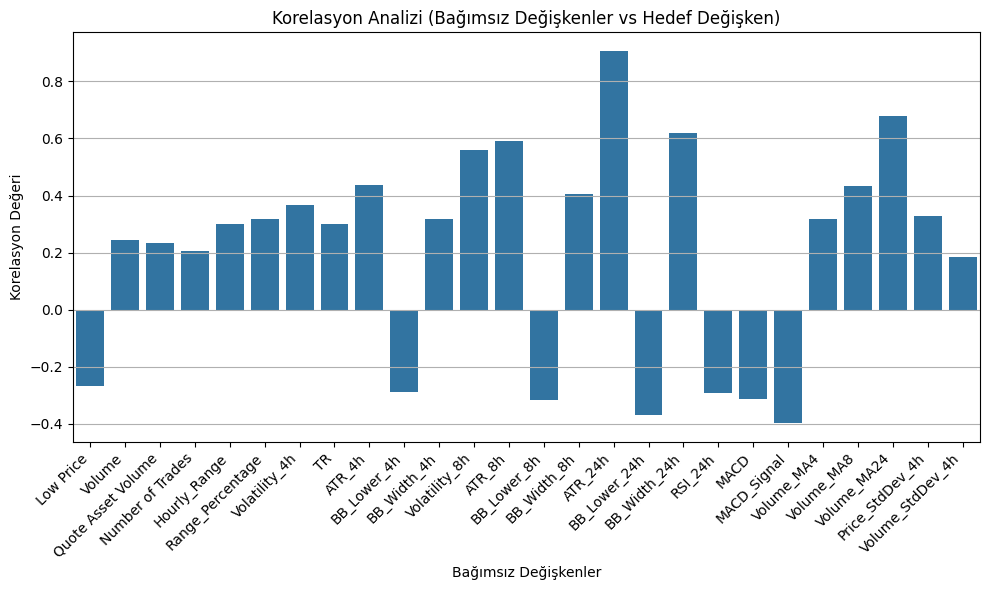

In [16]:

# 2. Korelasyon Analizi ve görsel olarak gösterilmesi
correlation_matrix = X_cleaned.corrwith(y_cleaned)
print("Korelasyon Analizi Sonuçları:")
print(correlation_matrix.sort_values(ascending=False))

# Korelasyon analizi (bağımsız değişkenlerle hedef değişken arasında)
correlation_matrix = X_cleaned.corrwith(y_cleaned)

# Korelasyon sonuçlarının görselleştirilmesi
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_matrix.index, y=correlation_matrix.values)
plt.title("Korelasyon Analizi (Bağımsız Değişkenler vs Hedef Değişken)")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Korelasyon Değeri")
plt.xlabel("Bağımsız Değişkenler")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [17]:

# 4. Feature Importance (Random Forest)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_scaled, y_cleaned)

feature_importance = pd.DataFrame({
    "Feature": X_cleaned.columns,
    "Importance": rf_model.feature_importances_
})

print("\nRandom Forest Feature Importance Sonuçları:")
print(feature_importance.sort_values(by="Importance", ascending=False))

# En anlamlı özelliklerin seçilmesi
selected_features = feature_importance[feature_importance["Importance"] > 0.006]["Feature"].tolist()
X_selected = X_cleaned[selected_features]

# Seçilen özelliklerin kaydedilmesi
df3_selected = pd.concat([X_selected, y_cleaned], axis=1)

df3_selected.to_csv("selected_volatility.csv", index=False)




Random Forest Feature Importance Sonuçları:
               Feature  Importance
15             ATR_24h    0.866859
23         Volume_MA24    0.018150
20         MACD_Signal    0.016731
16        BB_Lower_24h    0.014510
17        BB_Width_24h    0.011554
0            Low Price    0.009013
11       Volatility_8h    0.008529
13         BB_Lower_8h    0.007061
9          BB_Lower_4h    0.006996
3     Number of Trades    0.006528
19                MACD    0.005760
18             RSI_24h    0.005151
14         BB_Width_8h    0.002742
22          Volume_MA8    0.002680
12              ATR_8h    0.002490
6        Volatility_4h    0.002364
25    Volume_StdDev_4h    0.002316
8               ATR_4h    0.002188
21          Volume_MA4    0.001684
24     Price_StdDev_4h    0.001520
10         BB_Width_4h    0.001272
2   Quote Asset Volume    0.001079
1               Volume    0.001003
7                   TR    0.000717
5     Range_Percentage    0.000613
4         Hourly_Range    0.000489


In [18]:
# 3. Varyans Analizi (F-Test)
f_values, p_values = f_regression(X_selected, y_cleaned)
varyans_analizi = pd.DataFrame({
    "Feature": X_selected.columns,
    "F-Value": f_values,
    "P-Value": p_values
})

print("\nVaryans Analizi (F-Test) Sonuçları:")
print(varyans_analizi.sort_values(by="P-Value"))



Varyans Analizi (F-Test) Sonuçları:
            Feature      F-Value        P-Value
5           ATR_24h  3848.422885  4.108451e-314
9       Volume_MA24   712.683667  7.202475e-114
7      BB_Width_24h   513.743824   6.231677e-89
3     Volatility_8h   376.702096   1.713039e-69
8       MACD_Signal   156.111068   5.955059e-33
6      BB_Lower_24h   130.282435   3.911643e-28
4       BB_Lower_8h    91.902201   1.024166e-20
2       BB_Lower_4h    75.065870   2.352967e-17
0         Low Price    63.882705   4.406246e-15
1  Number of Trades    37.179469   1.648827e-09


In [19]:
# benzer şeyleri ifade eden birden çok   sutunun korelasyon ,varyans analizi ve onem skoruna göre çıkarılması (BB_Lower_4h,BB_Lower_8h,Volatility_8h)

X_selected  = X_selected.drop(["BB_Lower_4h", "BB_Lower_8h", "Volatility_8h"], axis=1)

In [20]:
# volatility_24h verisibe aşırı benzeyen  sutun çıkarılması (ATR_24h)
X_selected  = X_selected.drop(["ATR_24h"], axis=1)


In [21]:

# Seçilen özelliklerin kaydedilmesi
print("\nSeçilen özellikler CSV dosyasına kaydedildi.")
df3_selected = pd.concat([X_selected, y_cleaned], axis=1)

df3_selected.to_csv("selected_volatility.csv", index=False)

print("\nSeçilen özellikler CSV dosyasına kaydedildi.")


Seçilen özellikler CSV dosyasına kaydedildi.

Seçilen özellikler CSV dosyasına kaydedildi.


In [22]:
data = pd.read_csv('selected_volatility.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Low Price         833 non-null    float64
 1   Number of Trades  833 non-null    float64
 2   BB_Lower_24h      833 non-null    float64
 3   BB_Width_24h      833 non-null    float64
 4   MACD_Signal       833 non-null    float64
 5   Volume_MA24       833 non-null    float64
 6   Volatility_24h    833 non-null    float64
dtypes: float64(7)
memory usage: 45.7 KB


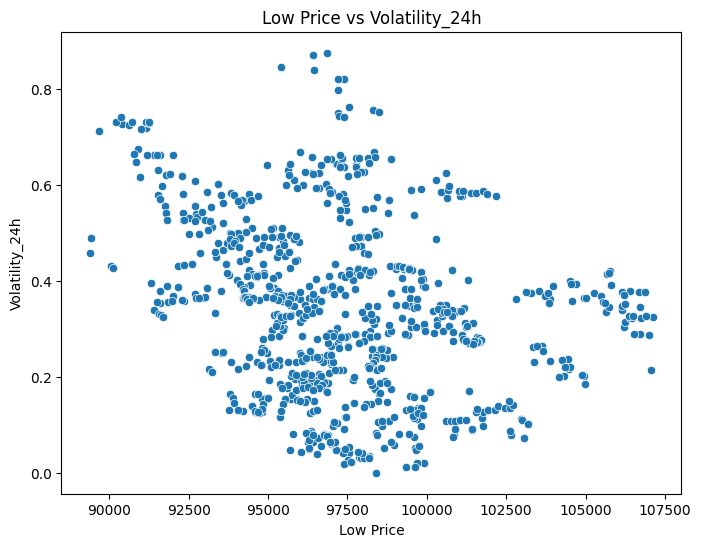

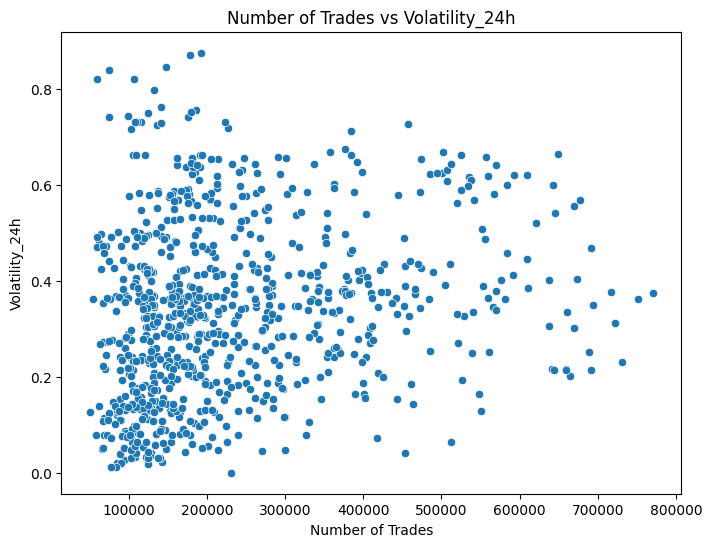

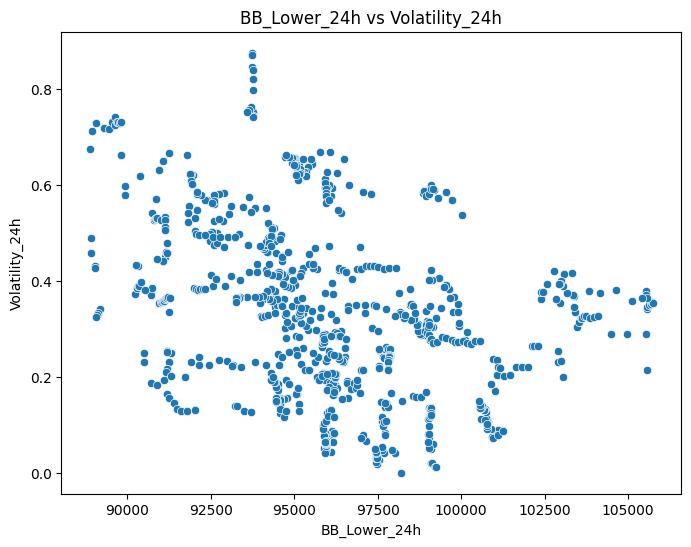

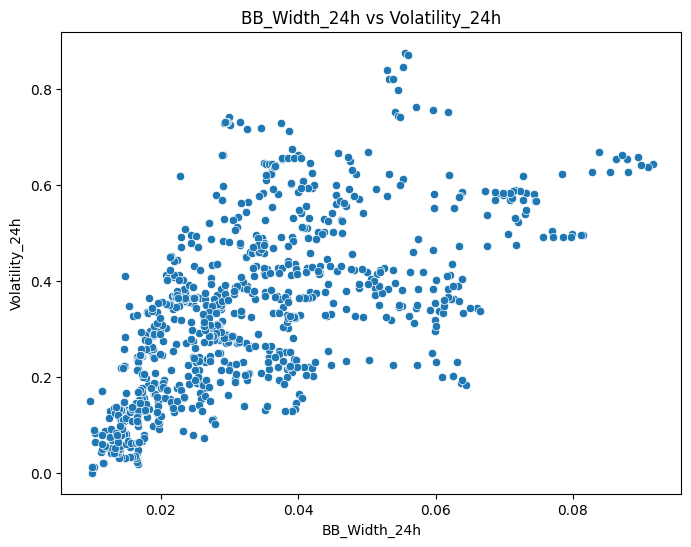

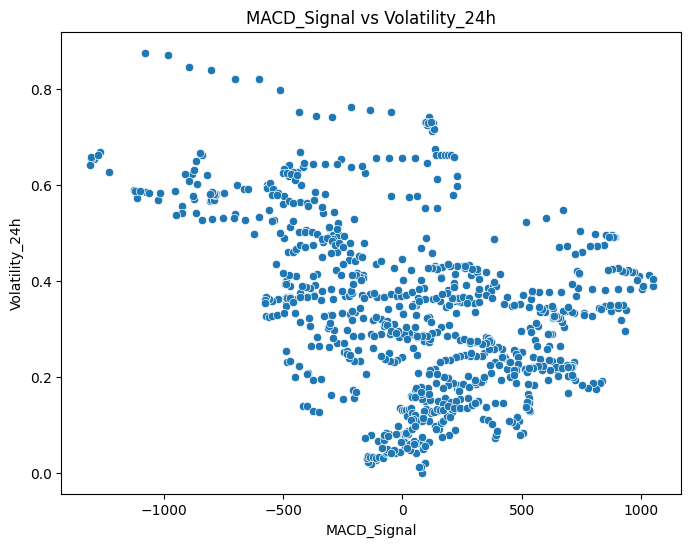

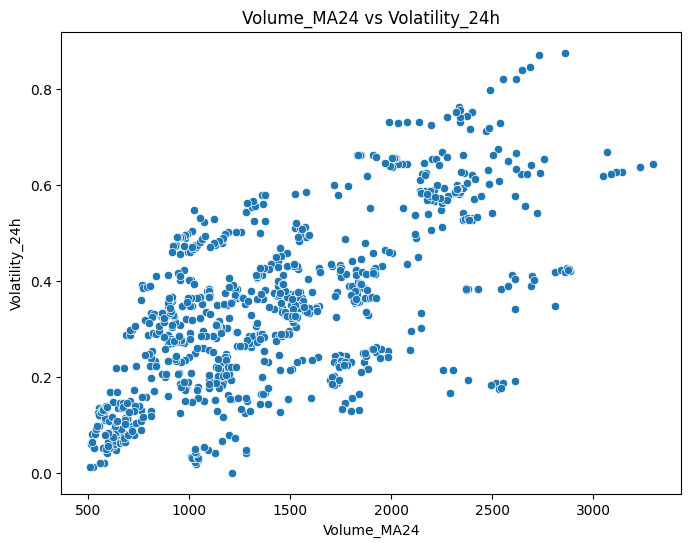

In [28]:
data = pd.DataFrame(data)

# Y ekseni olarak belirlenen sütun
y_column = "Volatility_24h"

# Karşılaştırılacak diğer sütunlar
columns_to_compare = [col for col in data if col != y_column]

# Scatterplotları çizme
for col in columns_to_compare:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col, y=y_column, data=data)
    plt.title(f"{col} vs {y_column}")
    plt.xlabel(col)
    plt.ylabel(y_column)
    plt.show()

In [23]:
data.head()

,Low Price,Number of Trades,BB_Lower_24h,BB_Width_24h,MACD_Signal,Volume_MA24,Volatility_24h
0,91415.79,329282.0,89183.805222,0.028752,-60.010247,2615.737155,0.340000
1,91555.54,214675.0,89129.535528,0.030655,0.689420,2147.451877,0.331500
2,91640.00,239853.0,89100.501013,0.031699,58.098457,1885.280493,0.327882
3,91680.00,185757.0,89062.768634,0.033149,111.241535,1728.061770,0.324034
4,90051.10,453341.0,89041.445390,0.033792,134.830878,1953.345162,0.431471


In [24]:

# Hedef ve bağımsız değişkenlerin ayrılması
X = data.drop("Volatility_24h", axis=1)
y = data["Volatility_24h"]


# 2. Eğitim ve Test Setlerine Ayırma
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# 3. Verilerin Ölçeklendirilmesi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Makine Öğrenmesi Modelleri
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(kernel="rbf"),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5)
}

# 6. Modellerin Eğitilmesi ve Değerlendirilmesi
results = {}
for model_name, model in models.items():
    # Modeli eğit
    model.fit(X_train_scaled, y_train)

    # Tahmin yap
    y_pred = model.predict(X_test_scaled)

    # Değerlendirme metrikleri
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {"MSE": mse, "R2": r2}

# 7. Sonuçları Analiz Et
print("\nModel Performans Karşılaştırması:")
for model_name, metrics in results.items():
    print(f"{model_name}: MSE = {metrics['MSE']:.8f}, R2 = {metrics['R2']:.4f}")

# 8. En İyi Modeli Kaydetme
best_model_name = max(results, key=lambda k: results[k]["R2"])
print(f"\nEn iyi model: {best_model_name}")


Model Performans Karşılaştırması:
Linear Regression: MSE = 0.00314526, R2 = 0.8873
Random Forest: MSE = 0.00136967, R2 = 0.9509
Support Vector Regressor: MSE = 0.00382665, R2 = 0.8629
Decision Tree: MSE = 0.00301693, R2 = 0.8919
KNN Regressor: MSE = 0.00389523, R2 = 0.8604

En iyi model: Random Forest


Volatility_24h için %75'lik eşik değer: 0.455700328683124

Model Performans Karşılaştırması:
Logistic Regression: Accuracy = 0.9080, Precision = 0.9000, Recall = 0.8919, F1-Score = 0.8959, ROC AUC = 0.9616
Random Forest: Accuracy = 0.9840, Precision = 0.9908, Recall = 0.9730, F1-Score = 0.9818, ROC AUC = 0.9946
Support Vector Machine: Accuracy = 0.9560, Precision = 0.9717, Recall = 0.9279, F1-Score = 0.9493, ROC AUC = 0.9942
Decision Tree: Accuracy = 0.9800, Precision = 0.9732, Recall = 0.9820, F1-Score = 0.9776, ROC AUC = 0.9802
K-Nearest Neighbors: Accuracy = 0.9800, Precision = 0.9732, Recall = 0.9820, F1-Score = 0.9776, ROC AUC = 0.9945

En iyi model: Random Forest


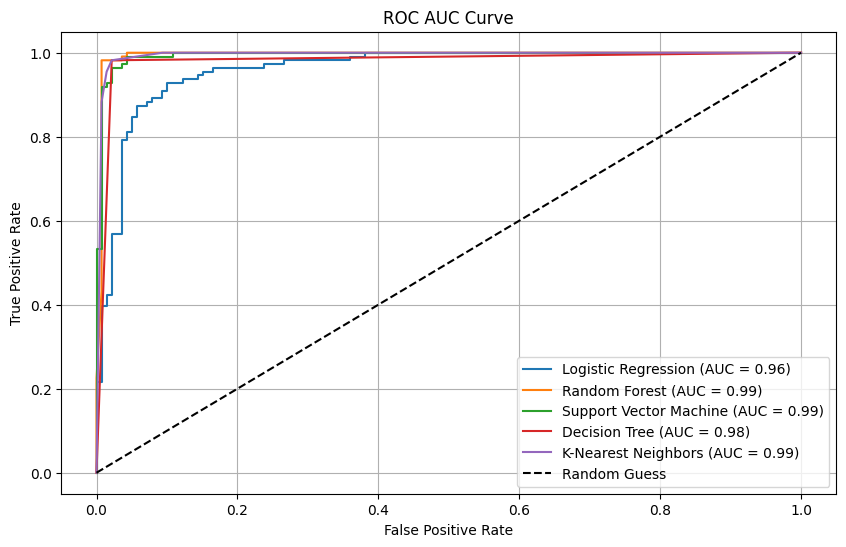

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Hedef ve bağımsız değişkenlerin ayrılması
df = data.copy()
X = df.drop("Volatility_24h", axis=1)
y = df["Volatility_24h"]

# 1. Volatility_24h değerlerini kategorilere ayırarak sınıflandırma
threshold = y.quantile(0.75)  # %75'lik eşik değeri
print(f"Volatility_24h için %75'lik eşik değer: {threshold}")

y_classified = np.where(y > threshold, 1, 0)  # 1: Riskli, 0: Risksiz

# 3. SMOTE ile Oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_classified)

# 4. Eğitim ve Test Setlerine Ayırma
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 5. Verilerin Ölçeklendirilmesi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Makine Öğrenmesi Modelleri
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel="rbf", probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

results = {}
roc_curves = {}

for model_name, model in models.items():
    # Modeli eğit
    model.fit(X_train_scaled, y_train)

    # Tahmin yap
    y_pred = model.predict(X_test_scaled)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Pozitif sınıf olasılıkları
    else:
        y_prob = model.decision_function(X_test_scaled)

    # Değerlendirme metrikleri
    report = classification_report(y_test, y_pred, output_dict=True)
    auc_score = roc_auc_score(y_test, y_prob)
    results[model_name] = {
        "Accuracy": report["accuracy"],
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1-Score": report["1"]["f1-score"],
        "ROC AUC": auc_score
    }

    # ROC Eğrisi
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_curves[model_name] = (fpr, tpr, auc_score)

# Sonuçları Analiz Et
print("\nModel Performans Karşılaştırması:")
for model_name, metrics in results.items():
    print(f"{model_name}: Accuracy = {metrics['Accuracy']:.4f}, Precision = {metrics['Precision']:.4f}, Recall = {metrics['Recall']:.4f}, F1-Score = {metrics['F1-Score']:.4f}, ROC AUC = {metrics['ROC AUC']:.4f}")

# En İyi Modeli Kaydetme
best_model_name = max(results, key=lambda k: results[k]["ROC AUC"])
print(f"\nEn iyi model: {best_model_name}")

# ROC AUC Grafiği
plt.figure(figsize=(10, 6))
for model_name, (fpr, tpr, auc_score) in roc_curves.items():
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve")
plt.legend()
plt.grid()
plt.show()


In [26]:
# # modellerin yorumlanması
# Volatilite tahmini için:

# Decision Tree ve Random Forest modelleriniz çok iyi çalışıyor
# SVR tahmin modelli için uygun değildir
# Logistic Regression ve SVM, daha basit veri kümelerinde iyi çalışabilirken, bu veri setindeki karmaşıklığı yakalamada daha az başarılı olmuştur.
# Linear Regression ile doğru veri volatility_24h tahmini yapılamiyor
# Ağaç bazlı modeller (Decision Tree, Random Forest) bu veri seti için en uygun görünüyor
#Random Forest modeli, hem regresyon hem de sınıflandırma görevlerinde en iyi performansı göstermiştir. Özellikle karmaşık ve nonlineer veriler için güçlü bir modeldir.

# Risk sınıflandırması için:
# Random Forest, genellikle yüksek doğruluk sağlar ve aşırı uyuma daha az eğilimlidir.
# Logistic Regression ve SVM, daha basit veri kümelerinde iyi çalışabilirken, bu veri setindeki karmaşıklığı yakalamada daha az başarılı olmuştur.
# tüm modeller  risk sınıflandırması için kabul edilebilir sonuçlar elde edilmiştir